In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA # Tambahan untuk visualisasi 2D yang lebih baik

In [84]:
df = pd.read_csv('DataCleanLabel.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


In [85]:
obese = df['NObeyesdad']
obese
# df_label_cluster = df[['Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'FAF', 'CAEC_Frequently',]]
df_label_cluster = df[['Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC', 'FAF', "FCVC"]]
df_label_cluster["BMI"] = df_label_cluster["Weight"] / ((df_label_cluster["Height"]/100) ** 2)
df_label_cluster = df_label_cluster.drop(columns=["Weight", "Height"])

df = df.drop(columns="NObeyesdad")
# df = df.drop(columns=features_to_drop)

df_scaled = MinMaxScaler().fit_transform(df_label_cluster)
# df_scaled = df
df_scaled

/var/folders/wm/v47lypj90l1gqzsfzt6rzn2c0000gn/T/ipykernel_9151/1667140546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_cluster["BMI"] = df_label_cluster["Weight"] / ((df_label_cluster["Height"]/100) ** 2)


array([[1.        , 0.        , 0.66666667, 0.        , 0.5       ,
        0.30116153],
       [1.        , 0.        , 0.66666667, 1.        , 1.        ,
        0.29723963],
       [1.        , 0.        , 0.66666667, 0.66666667, 0.5       ,
        0.28473615],
       ...,
       [1.        , 1.        , 0.66666667, 0.471403  , 1.        ,
        0.807793  ],
       [1.        , 1.        , 0.66666667, 0.37970233, 1.        ,
        0.82174899],
       [1.        , 1.        , 0.66666667, 0.34215067, 1.        ,
        0.82367432]], shape=(2064, 6))

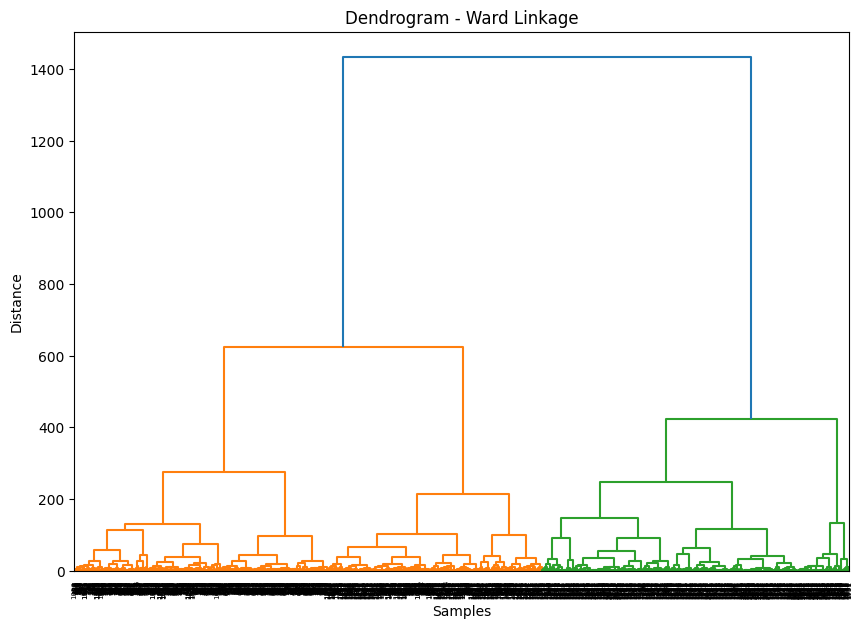

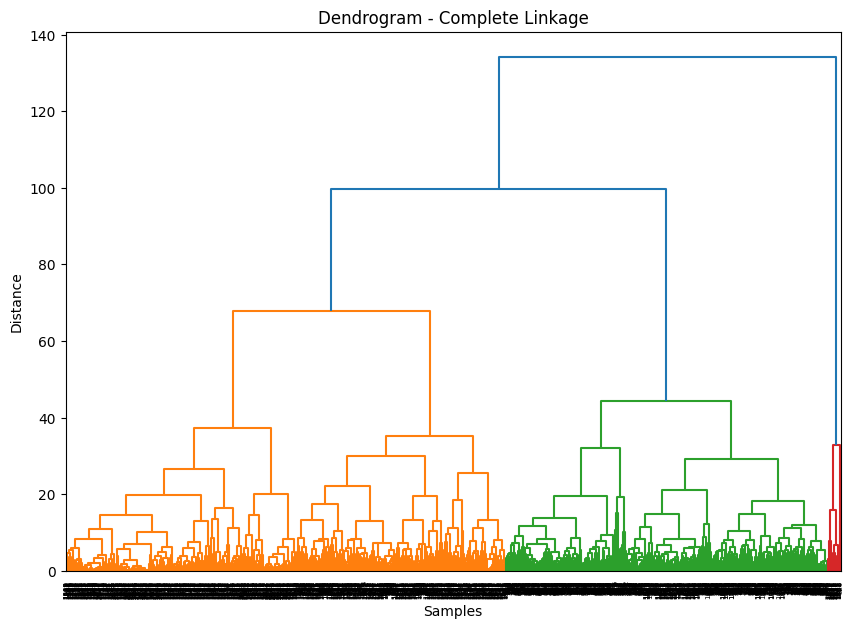

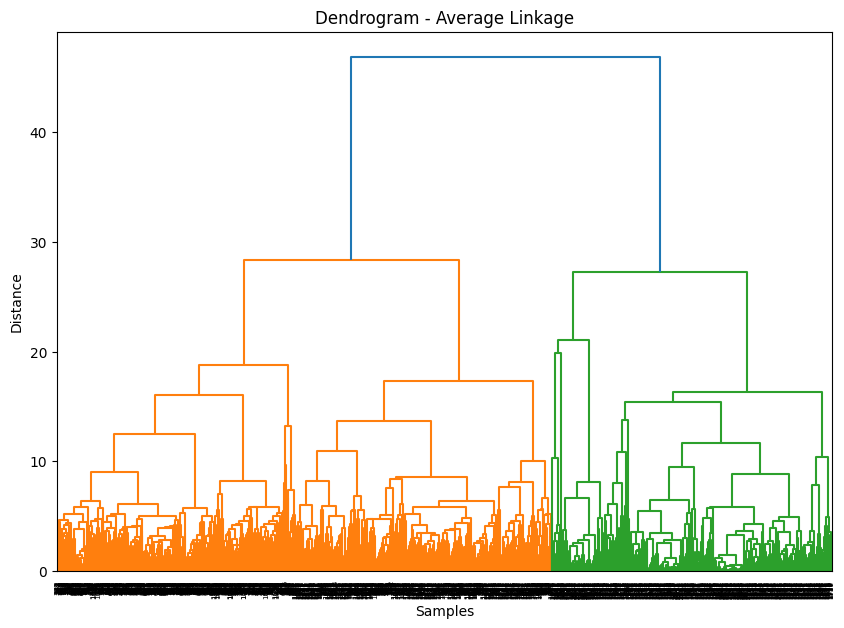

In [69]:

# Visualisasi Dendrogram
linked = linkage(df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  

linked = linkage(df, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

linked = linkage(df, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Average Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()



In [86]:
agg_ward = AgglomerativeClustering(n_clusters=5, linkage="ward", metric="euclidean")
labels_ward = agg_ward.fit_predict(df_scaled)
agg_avg = AgglomerativeClustering(n_clusters=5, linkage="average")
labels_avg = agg_avg.fit_predict(df_scaled)
agg_complete = AgglomerativeClustering(n_clusters=5, linkage="complete")
labels_complete = agg_complete.fit_predict(df_scaled)

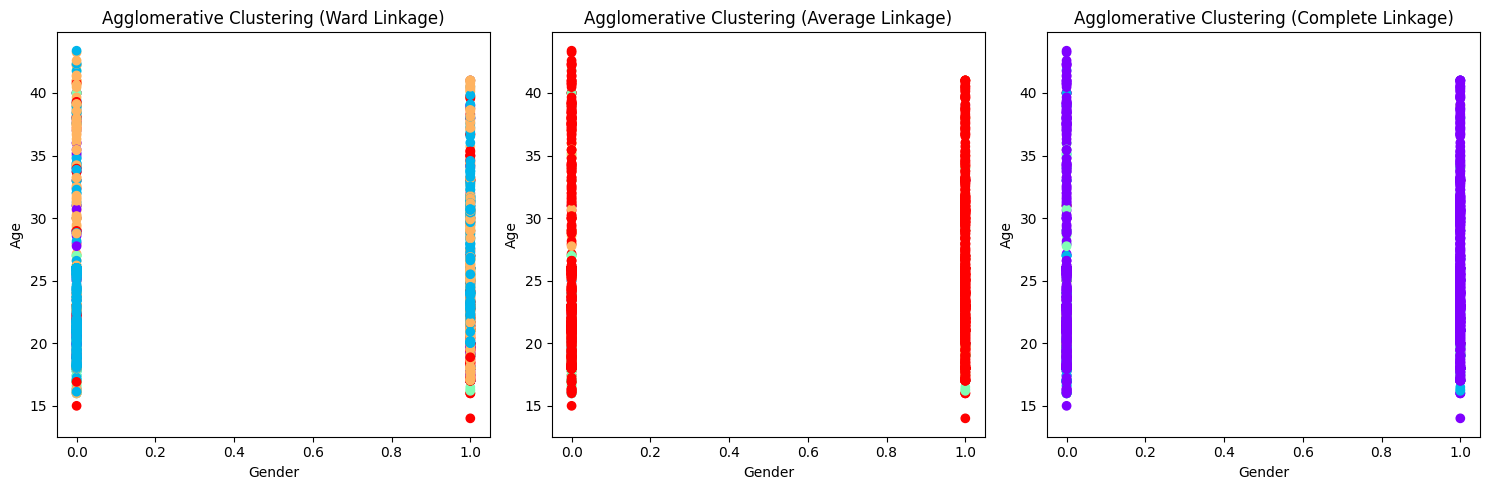

In [87]:
# Visualisasi Hasil Clustering
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_ward, cmap='rainbow')
plt.title('Agglomerative Clustering (Ward Linkage)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.subplot(1, 3, 2)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_avg, cmap='rainbow')
plt.title('Agglomerative Clustering (Average Linkage)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.subplot(1, 3, 3)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_complete, cmap='rainbow')
plt.title('Agglomerative Clustering (Complete Linkage)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.tight_layout()
plt.show()


In [88]:
# Menambahkan label cluster ke DataFrame asli
df['Cluster_Ward'] = labels_ward
df['Cluster_Avg'] = labels_avg
df['Cluster_Complete'] = labels_complete
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster_Ward,Cluster_Avg,Cluster_Complete
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,0,3,2
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,0,3,2
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,0,3,2
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,0,0,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,0,0,4


Cluster Summary (Ward Linkage):
                Gender        Age    Height      Weight  \
Cluster_Ward                                              
0             0.414226  22.759262  1.655737   66.897740   
1             0.334855  24.776686  1.704567  106.650762   
2             0.375000  21.075138  1.652341   58.699452   
3             0.674884  25.440203  1.720265   89.784725   
4             0.725490  23.144820  1.752416   76.927113   

              family_history_with_overweight  FAVC      FCVC       NCP  \
Cluster_Ward                                                             
0                                   0.594142   0.0  2.458212  2.705692   
1                                   1.000000   1.0  2.920411  2.749060   
2                                   0.000000   1.0  2.307258  2.607781   
3                                   1.000000   1.0  1.957895  2.623098   
4                                   1.000000   1.0  2.408286  2.860405   

                  CAEC     SMOKE   

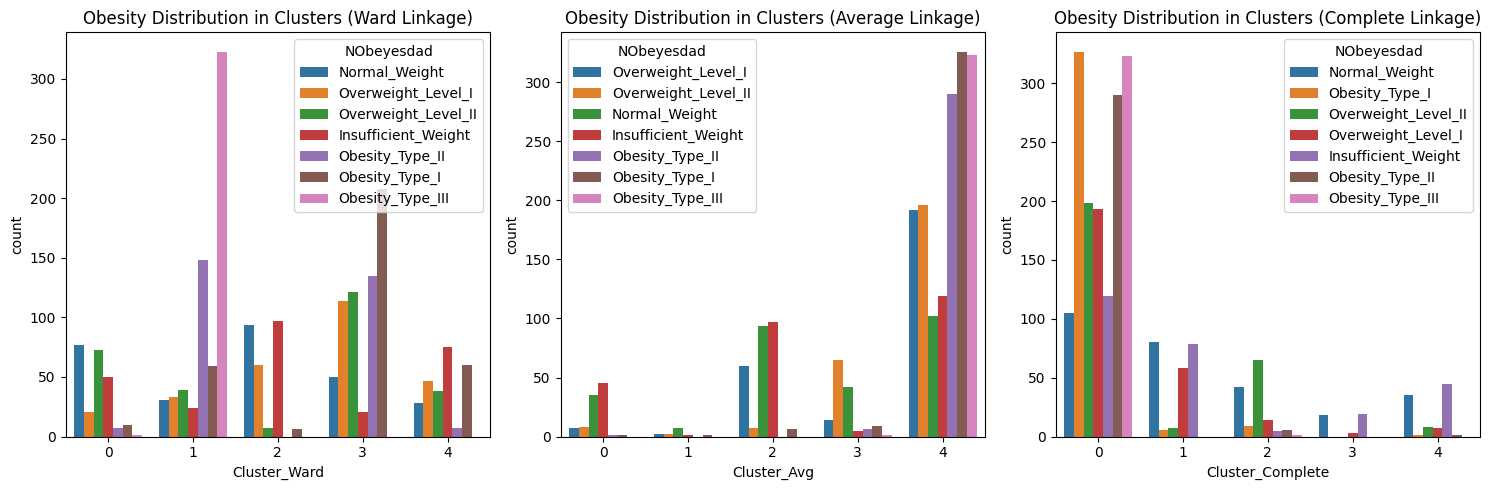

In [89]:
# Analisis Cluster
cluster_summary_ward = df.groupby('Cluster_Ward').mean()
cluster_summary_avg = df.groupby('Cluster_Avg').mean()
cluster_summary_complete = df.groupby('Cluster_Complete').mean()

print("Cluster Summary (Ward Linkage):")
print(cluster_summary_ward)
print("\nCluster Summary (Average Linkage):")
print(cluster_summary_avg)
print("\nCluster Summary (Complete Linkage):")
print(cluster_summary_complete)

# Visualisasi Distribusi Obesitas dalam Cluster
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Cluster_Ward', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Ward Linkage)')
plt.subplot(1, 3, 2)
sns.countplot(x='Cluster_Avg', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Average Linkage)')
plt.subplot(1, 3, 3)
sns.countplot(x='Cluster_Complete', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Complete Linkage)')
plt.tight_layout()
plt.show()

In [90]:
silhouette_ward = silhouette_score(df_scaled, labels_ward)
silhouette_avg = silhouette_score(df_scaled, labels_avg)
silhouette_complete = silhouette_score(df_scaled, labels_complete)

print(f'Silhouette Score (Ward Linkage): {silhouette_ward}')
print(f'Silhouette Score (Average Linkage): {silhouette_avg}')
print(f'Silhouette Score (Complete Linkage): {silhouette_complete}')

Silhouette Score (Ward Linkage): 0.33735798766392483
Silhouette Score (Average Linkage): 0.4364150461037348
Silhouette Score (Complete Linkage): 0.4838865788225955


In [75]:
#Menggunakan Data Dengan one-hot encoding untuk variabel kategorikal

df = pd.read_csv('DataCleanOneHot.csv')
df = df.drop(columns="NObeyesdad")


df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,SMOKE_yes,...,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight_yes
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0,0,...,1,0,0,0,1,0,0,1,0,1
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0,1,...,1,0,0,1,0,0,0,1,0,1
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,0,...,1,0,1,0,0,0,0,1,0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1,0,...,1,0,1,0,0,0,0,0,1,0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1,0,...,1,0,0,1,0,0,0,1,0,0


In [92]:
df = pd.read_csv('DataCleanOneHot.csv')

df_onehot_cluster = df[['Weight', 'Height', 'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently', 'FAF', "FCVC"]]
df_onehot_cluster["BMI"] = df_onehot_cluster["Weight"] / ((df_onehot_cluster["Height"]/100) ** 2)
df_onehot_cluster = df_onehot_cluster.drop(columns=["Weight", "Height"])

df_onehot = df_onehot_cluster
df_onehot_scaled = MinMaxScaler().fit_transform(df_onehot)
df_onehot_scaled

/var/folders/wm/v47lypj90l1gqzsfzt6rzn2c0000gn/T/ipykernel_9151/1131175198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_onehot_cluster["BMI"] = df_onehot_cluster["Weight"] / ((df_onehot_cluster["Height"]/100) ** 2)


array([[1.        , 0.        , 1.        , ..., 0.        , 0.5       ,
        0.30116153],
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.29723963],
       [1.        , 0.        , 1.        , ..., 0.66666667, 0.5       ,
        0.28473615],
       ...,
       [1.        , 1.        , 1.        , ..., 0.471403  , 1.        ,
        0.807793  ],
       [1.        , 1.        , 1.        , ..., 0.37970233, 1.        ,
        0.82174899],
       [1.        , 1.        , 1.        , ..., 0.34215067, 1.        ,
        0.82367432]], shape=(2064, 8))

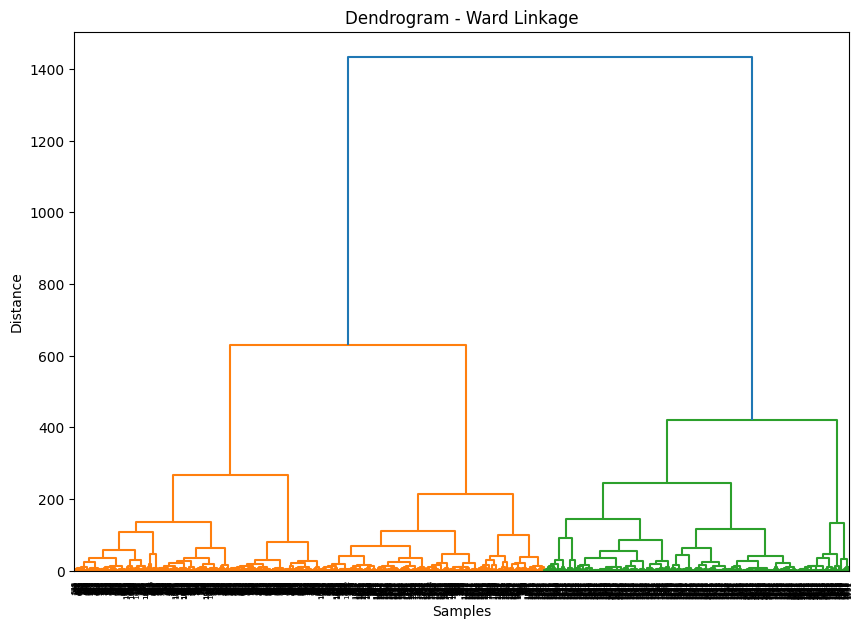

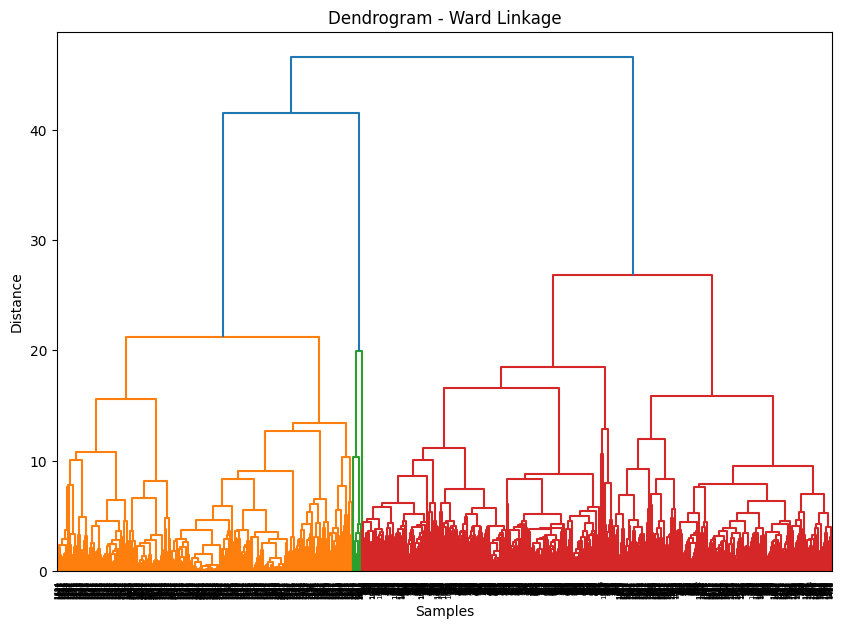

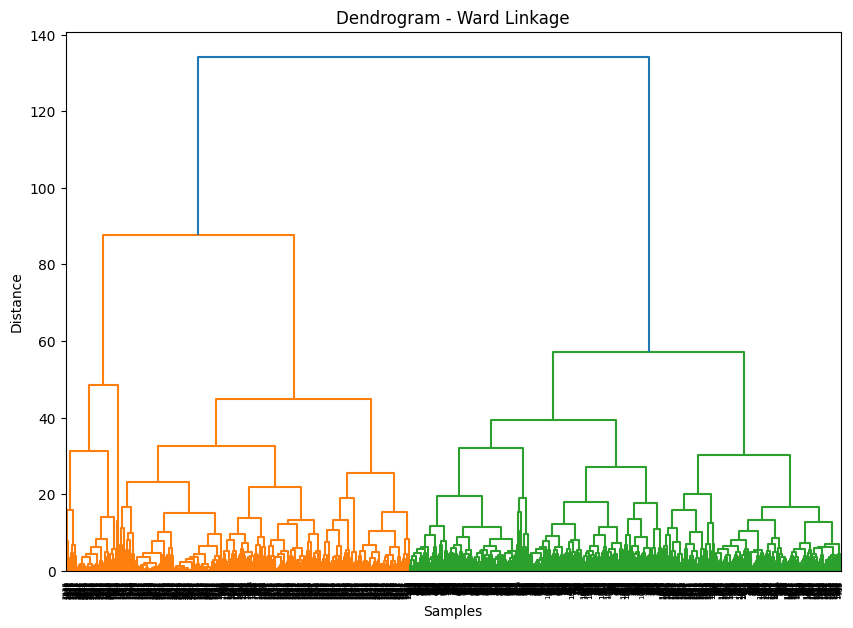

In [77]:
# Visualisasi Dendrogram
linked = linkage(df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  

linked = linkage(df, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  

linked = linkage(df, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  


In [93]:
agg_ward = AgglomerativeClustering(n_clusters=3, linkage="ward", metric="euclidean")
labels_ward = agg_ward.fit_predict(df_onehot_scaled)

agg_avg = AgglomerativeClustering(n_clusters=3, linkage="average")
labels_avg = agg_avg.fit_predict(df_onehot_scaled)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
labels_complete = agg_complete.fit_predict(df_onehot_scaled)


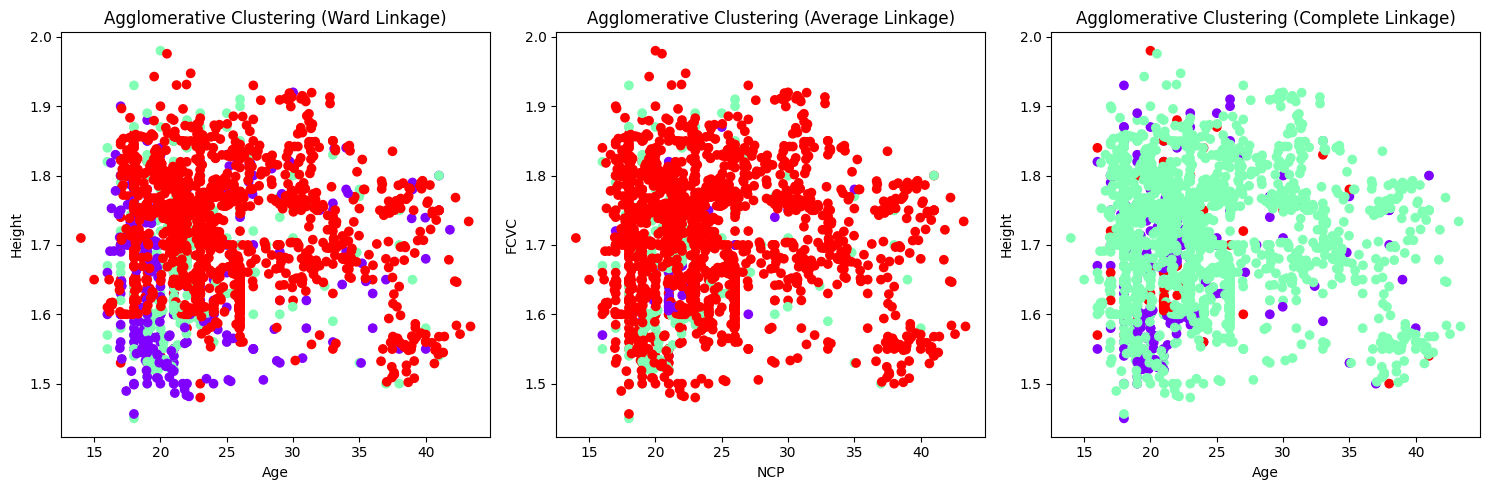

In [79]:
# Visualisasi Hasil Clustering
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_ward, cmap='rainbow')
plt.title('Agglomerative Clustering (Ward Linkage)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.subplot(1, 3, 2)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_avg, cmap='rainbow')
plt.title('Agglomerative Clustering (Average Linkage)')
plt.xlabel(df.columns[4])
plt.ylabel(df.columns[3])
plt.subplot(1, 3, 3)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_complete, cmap='rainbow')
plt.title('Agglomerative Clustering (Complete Linkage)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.tight_layout()
plt.show()

In [80]:
df['Cluster_Ward'] = labels_ward
df['Cluster_Avg'] = labels_avg
df['Cluster_Complete'] = labels_complete
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,SMOKE_yes,...,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight_yes,Cluster_Ward,Cluster_Avg,Cluster_Complete
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0,0,...,0,1,0,0,1,0,1,0,2,1
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0,1,...,1,0,0,0,1,0,1,0,2,1
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,0,...,0,0,0,0,1,0,1,0,2,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1,0,...,0,0,0,0,0,1,0,0,2,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1,0,...,1,0,0,0,1,0,0,0,2,1


Cluster Summary (Ward Linkage):
                    Age    Height     Weight      FCVC       NCP      CH2O  \
Cluster_Ward                                                                 
0             21.944931  1.654900  65.240156  2.330620  2.633647  1.853685   
1             21.969609  1.675384  61.929071  2.413360  2.754681  1.908383   
2             25.050956  1.720564  97.667280  2.445955  2.703110  2.062640   

                   FAF       TUE  Gender_Male  SMOKE_yes  ...  \
Cluster_Ward                                              ...   
0             1.154034  0.734929     0.393293   0.021341  ...   
1             1.123677  0.642768     0.403727   0.040373  ...   
2             0.960432  0.661051     0.553041   0.014144  ...   

              CALC_Frequently  CALC_Sometimes   CALC_no  MTRANS_Bike  \
Cluster_Ward                                                           
0                    0.039634        0.615854  0.344512     0.015244   
1                    0.071429      

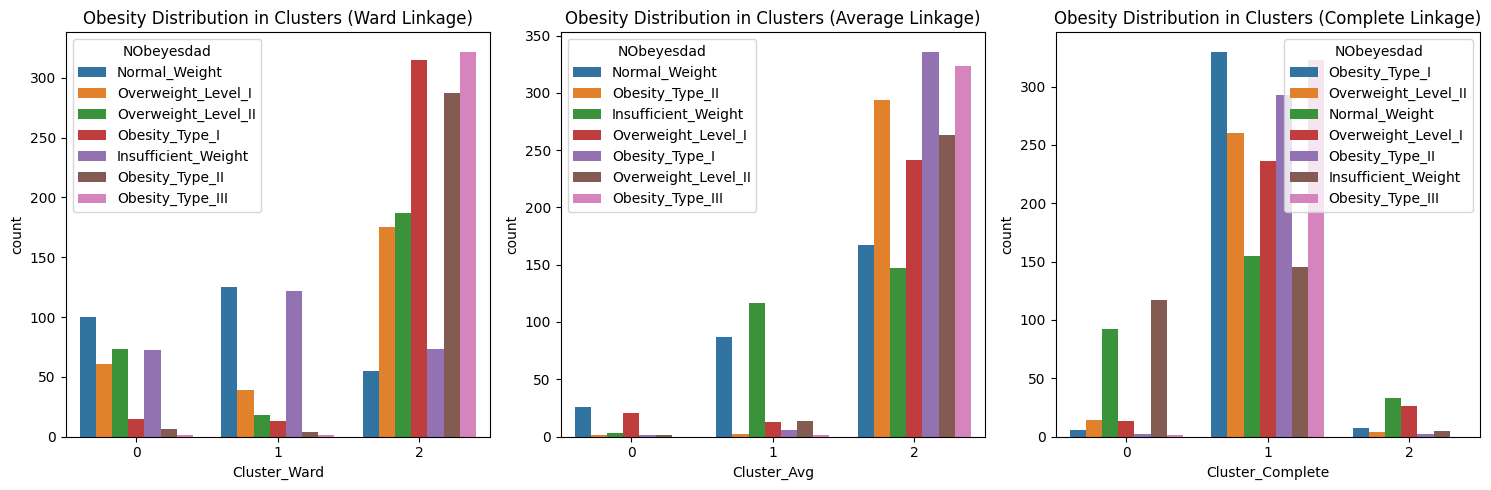

In [81]:
# Analisis Cluster
cluster_summary_ward = df.groupby('Cluster_Ward').mean()
cluster_summary_avg = df.groupby('Cluster_Avg').mean()
cluster_summary_complete = df.groupby('Cluster_Complete').mean()

print("Cluster Summary (Ward Linkage):")
print(cluster_summary_ward)
print("\nCluster Summary (Average Linkage):")
print(cluster_summary_avg)
print("\nCluster Summary (Complete Linkage):")
print(cluster_summary_complete)

# Visualisasi Distribusi Obesitas dalam Cluster
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Cluster_Ward', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Ward Linkage)')
plt.subplot(1, 3, 2)
sns.countplot(x='Cluster_Avg', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Average Linkage)')
plt.subplot(1, 3, 3)
sns.countplot(x='Cluster_Complete', hue=obese, data=df)
plt.title('Obesity Distribution in Clusters (Complete Linkage)')
plt.tight_layout()
plt.show()

In [94]:
silhouette_ward = silhouette_score(df_onehot_scaled, labels_ward)
silhouette_avg = silhouette_score(df_onehot_scaled, labels_avg)
silhouette_complete = silhouette_score(df_onehot_scaled, labels_complete)

print(f'Silhouette Score (Ward Linkage): {silhouette_ward}')
print(f'Silhouette Score (Average Linkage): {silhouette_avg}')
print(f'Silhouette Score (Complete Linkage): {silhouette_complete}')

Silhouette Score (Ward Linkage): 0.4404881710706771
Silhouette Score (Average Linkage): 0.5199654765292371
Silhouette Score (Complete Linkage): 0.4744830124352037
